In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
data = yf.download(tickers ='NTPC.NS', period = "3y", interval = "1D", group_by = 'ticker',auto_adjust = True,prepost = True,threads = True,proxy = None)

[*********************100%***********************]  1 of 1 completed


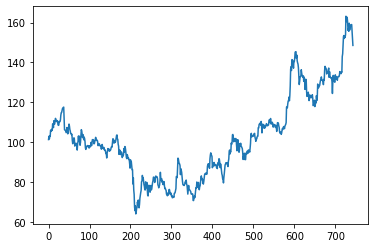

In [3]:
df=pd.DataFrame(data)
data
df1=df.reset_index()['Close']
plt.plot(df1)

In [4]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size]
test_data=df1[training_size:len(df1)]
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)
print(train_data)
print(test_data)

          Close
0    101.241875
1    102.921722
2    101.569641
3    103.044647
4    102.839790
..          ...
478   94.374969
479   91.242973
480   91.242973
481   91.150841
482   94.467102

[483 rows x 1 columns]
          Close
483   94.328926
484   94.006508
485   95.434341
486   94.927689
487   94.374969
..          ...
739  159.000000
740  159.000000
741  155.449997
742  152.550003
743  148.550003

[261 rows x 1 columns]


In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data)
# test_data=scalar.fit_transform(test_data)
print(scaled_train_data)
# print(test_data)

[[0.69607492]
 [0.72738367]
 [0.70218378]
 [0.72967472]
 [0.72585663]
 [0.78312885]
 [0.77320161]
 [0.78847412]
 [0.79229221]
 [0.78160124]
 [0.84345557]
 [0.8342922 ]
 [0.80832845]
 [0.87247354]
 [0.84421916]
 [0.84192839]
 [0.87170981]
 [0.89461907]
 [0.87323713]
 [0.87094622]
 [0.8755279 ]
 [0.86178272]
 [0.86941904]
 [0.83658297]
 [0.82894665]
 [0.83123742]
 [0.86560081]
 [0.86407349]
 [0.86407349]
 [0.88010987]
 [0.92363676]
 [0.94807319]
 [0.94960009]
 [0.96792724]
 [0.98625439]
 [0.99236325]
 [0.9969455 ]
 [1.        ]
 [0.89385505]
 [0.78847412]
 [0.78771053]
 [0.7800742 ]
 [0.77854702]
 [0.76098361]
 [0.76327438]
 [0.80909204]
 [0.78083808]
 [0.74952905]
 [0.79305594]
 [0.80756486]
 [0.84116494]
 [0.82283751]
 [0.79076503]
 [0.77625611]
 [0.75334714]
 [0.75181996]
 [0.74189272]
 [0.74647469]
 [0.68920204]
 [0.65712985]
 [0.69302056]
 [0.68843845]
 [0.71287489]
 [0.70142033]
 [0.63517501]
 [0.64218937]
 [0.64530658]
 [0.66245251]
 [0.6476447 ]
 [0.64686547]
 [0.59776594]
 [0.65

In [6]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
time_step = 100
X_train, y_train = create_dataset(scaled_train_data, time_step)
len(X_train[0])
# y_train

100

In [8]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_train.shape

(382, 100, 1)

In [9]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
hist=model.fit(X_train,y_train,epochs=10,batch_size=30,verbose=1)

Epoch 1/10
13/13 [==============================] - 21s 311ms/step - loss: 0.0744
Epoch 2/10
13/13 [==============================] - 4s 304ms/step - loss: 0.0232
Epoch 3/10
13/13 [==============================] - 4s 295ms/step - loss: 0.0181
Epoch 4/10
13/13 [==============================] - 4s 285ms/step - loss: 0.0164
Epoch 5/10
13/13 [==============================] - 4s 289ms/step - loss: 0.0143
Epoch 6/10
13/13 [==============================] - 4s 285ms/step - loss: 0.0160
Epoch 7/10
13/13 [==============================] - 4s 286ms/step - loss: 0.0173
Epoch 8/10
13/13 [==============================] - 4s 289ms/step - loss: 0.0146
Epoch 9/10
13/13 [==============================] - 4s 276ms/step - loss: 0.0135
Epoch 10/10
13/13 [==============================] - 4s 287ms/step - loss: 0.0114


In [11]:
scaled_test_data=scaler.transform(test_data)
y_test=scaled_test_data[time_step:]
X_test=[]
for i in range(time_step,len(scaled_test_data)):
    X_test.append(scaled_test_data[i-time_step:i])
X_test=np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_test.shape

(161, 100, 1)

In [12]:
y_test.shape

(161, 1)

In [13]:
scaled_test_data

array([[0.56723244],
       [0.56122326],
       [0.58783501],
       [0.57839209],
       [0.56809059],
       [0.59899465],
       [0.59041031],
       [0.59298575],
       [0.57839209],
       [0.61272974],
       [0.65822717],
       [0.7440713 ],
       [0.75437265],
       [0.72175187],
       [0.72432717],
       [0.73376995],
       [0.73119465],
       [0.72776077],
       [0.7466466 ],
       [0.74750504],
       [0.75437265],
       [0.71660112],
       [0.70286618],
       [0.67968817],
       [0.70629977],
       [0.70114902],
       [0.71745956],
       [0.72861949],
       [0.72776077],
       [0.807596  ],
       [0.80416212],
       [0.8367829 ],
       [0.84365052],
       [0.84880126],
       [0.83849977],
       [0.8316323 ],
       [0.86596995],
       [0.82476482],
       [0.75866482],
       [0.83506617],
       [0.84021692],
       [0.82218952],
       [0.83506617],
       [0.80158682],
       [0.80330368],
       [0.82819842],
       [0.807596  ],
       [0.823

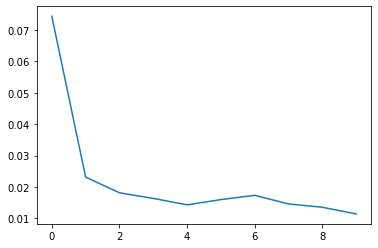

In [14]:
plt.plot(hist.history['loss'])
plt.show()

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
y_train=y_train.reshape(-1,1)
y_train=scaler.inverse_transform(y_train)
# y_test=ytest.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

In [16]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

5.240493985120196
12.63670438463109


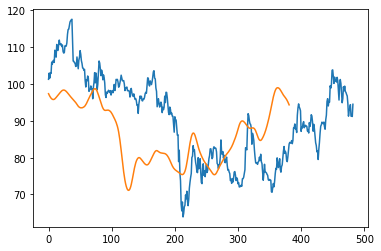

In [17]:
plt.plot(train_data)
plt.plot(train_predict)


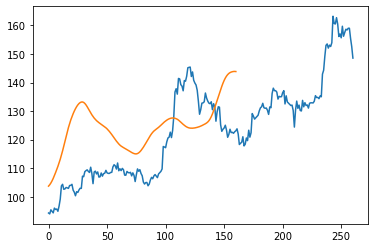

In [18]:
plt.plot(test_data.values)
plt.plot(test_predict)